In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

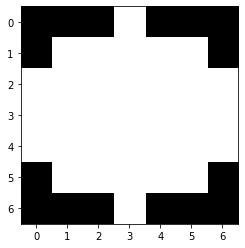

In [7]:
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
plt.imshow(kernel_ellipse, cmap='gray');

Text(0.5, 1.0, 'Final')

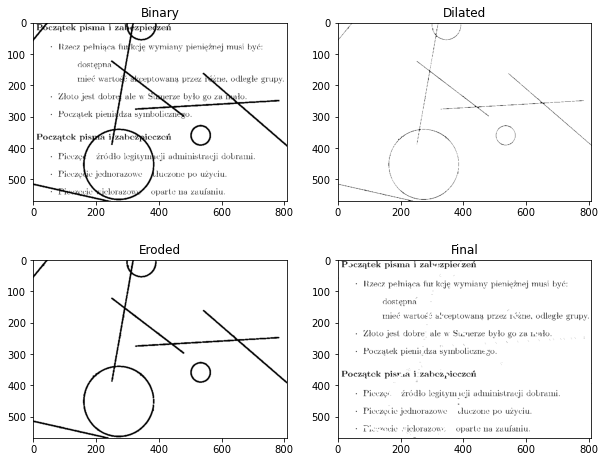

In [200]:
#Zad.1
text = cv.imread("img/text_no_ocr.png", cv.IMREAD_GRAYSCALE)
_, text_bin = cv.threshold(text, 100, 255, cv.THRESH_BINARY)

kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

text_dilated = cv.dilate(text_bin, kernel_ellipse, iterations=1)

text_eroded = cv.erode(text_dilated, kernel_ellipse, iterations=1)

final_img = text_bin - text_eroded
final_img = cv.bitwise_not(final_img)


plt.figure(figsize=[10,8])
plt.subplot(221)
plt.imshow(text_bin, cmap='gray')
plt.title("Binary")
plt.subplot(222)
plt.imshow(text_dilated, cmap='gray')
plt.title("Dilated")
plt.subplot(223)
plt.imshow(text_eroded, cmap='gray')
plt.title("Eroded")
plt.subplot(224)
plt.imshow(final_img, cmap='gray')
plt.title("Final")

In [201]:
#zad.2

Text(0.5, 1.0, 'Opened')

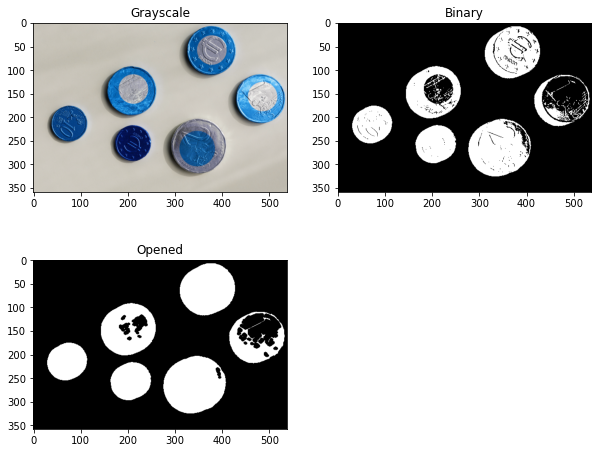

In [202]:
coins = cv.imread("img/coins.png")
coins_gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)
_, coins_bin = cv.threshold(coins_gray, 160, 255, cv.THRESH_BINARY_INV)


kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))

coins_opened = cv.morphologyEx(coins_bin, cv.MORPH_CLOSE, kernel, iterations=1)


plt.figure(figsize=[10,8])
plt.subplot(221)
plt.imshow(coins, cmap='gray')
plt.title("Grayscale")
plt.subplot(222)
plt.imshow(coins_bin, cmap='gray')
plt.title("Binary")
plt.subplot(223)
plt.imshow(coins_opened, cmap='gray')
plt.title("Opened")

No. of contours: 6


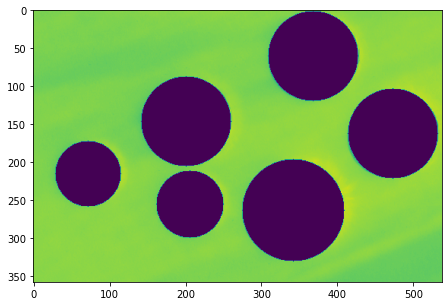

In [203]:
shapes_contours, _ = cv.findContours(coins_opened, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f"No. of contours: {len(shapes_contours)}")
# shapes_with_contours = coins.copy()


shapes_with_bb = coins_gray.copy()

# cv.drawContours(shapes_with_contours, shapes_contours, -1, (255,255,0), 2)
for idx, contour in enumerate(shapes_contours):
    (x,y), radius = cv.minEnclosingCircle(contour)
    cv.circle(shapes_with_bb, (int(x),int(y)), int(round(radius)), (0,0,0), -1)
#     cv.putText(shapes_with_bb, str(idx + 1), (int(x-10),int(y+10)), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
plt.figure(figsize=[10,5])
plt.imshow(shapes_with_bb);

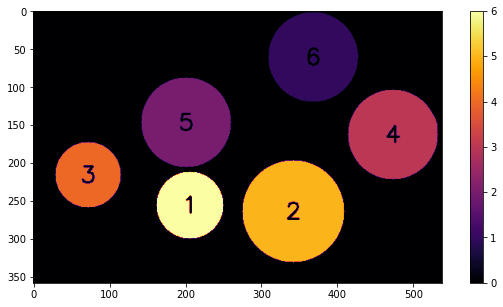

In [204]:
_, coins_binary = cv.threshold(shapes_with_bb, 127, 255, cv.THRESH_BINARY_INV)

_, coins_labels = cv.connectedComponents(coins_binary)


for idx, contour in enumerate(shapes_contours):
    (x,y), radius = cv.minEnclosingCircle(contour)
    cv.putText(coins_labels, str(idx + 1), (int(x-10),int(y+10)), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)



plt.figure(figsize=[10,5])


plt.imshow(coins_labels, cmap='inferno')
plt.colorbar();